In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

### Histogram equalization 

*  2 Methods 

1) perform histogram equalization on RGB channels 
2) convert RGB to HSI channel and perform histogram equalization on intensity

##### Histogram Equalization on Grey level image 

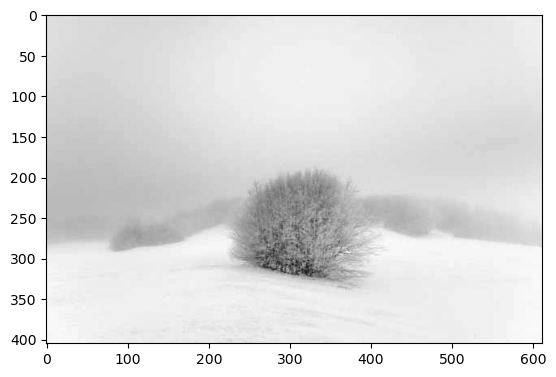

In [3]:
## import image 
image=cv2.imread("D:\ippr\experiment_2\low_contrast_img.jpg")
## converting to grey scale 
grey_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image,cmap="grey")

In [4]:
# calculating original image histogram
img_hist=cv2.calcHist([grey_image],[0],None,[256],[0,256])
# calculating equalized histogram 
Equ_hist=cv2.equalizeHist(grey_image)

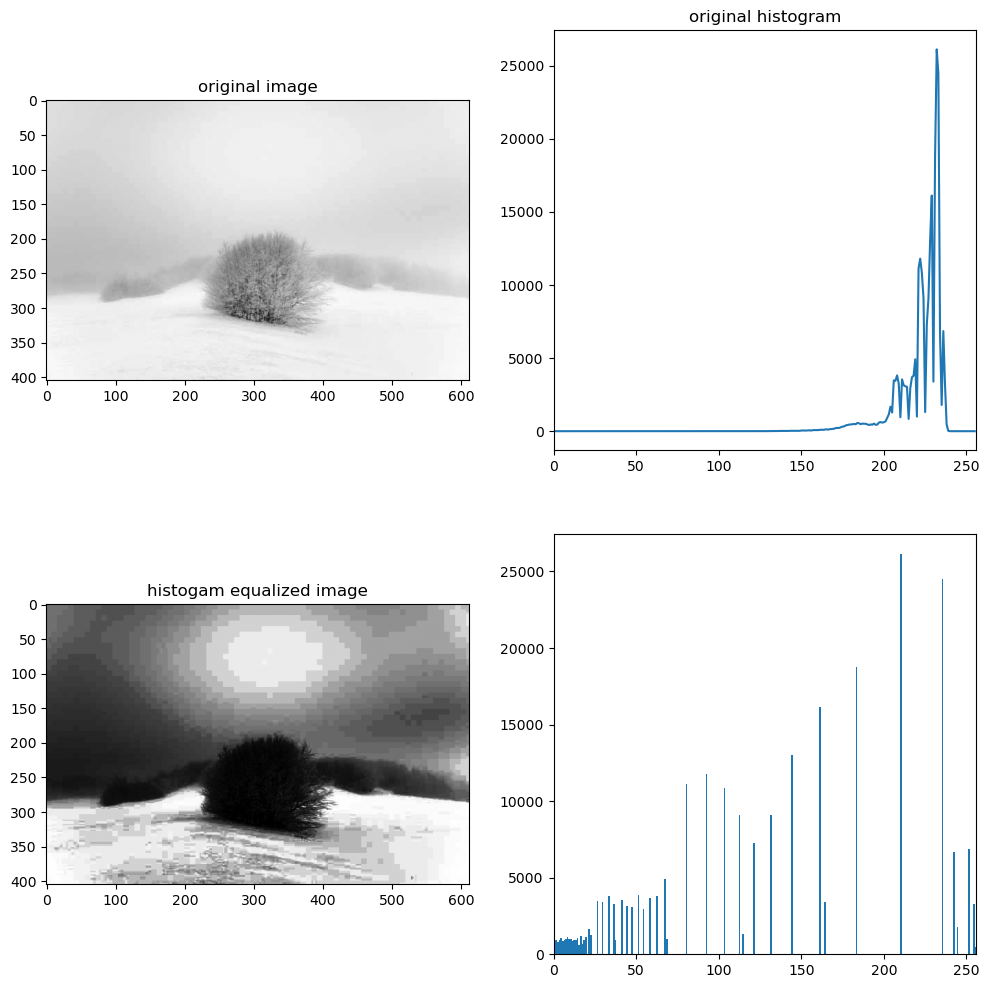

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
# original image 
plt.imshow(grey_image,cmap='grey')
plt.title("original image")

# contrast improved image 
plt.subplot(2,2,3)
plt.imshow(Equ_hist,cmap='grey')
plt.title("histogam equalized image")


# original image histogram 
plt.subplot(2,2,2)
plt.title("original histogram")
plt.xlim([0,256])
plt.plot(img_hist)


#contrast improved image histogram 
plt.subplot(2,2,4)
plt.xlim([0,256])
plt.hist(Equ_hist.ravel(),bins=256, range=(0,256))
plt.show()

## PART A : Perform Histogram Equalization on RGB channels 

In [32]:
image_2=cv2.imread("D:\ippr\experiment_1\image.jpg")
image_2=cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)

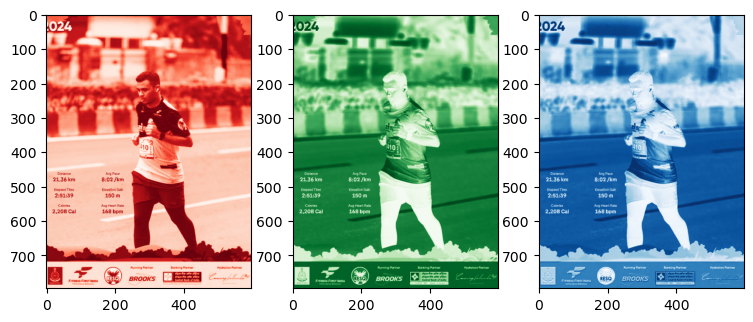

In [33]:
R=image_2[:,:,0]
G=image_2[:,:,1]
B=image_2[:,:,2]
plt.figure(figsize=(9,12))
plt.subplot(1,3,1)
plt.imshow(R,cmap='Reds_r')
plt.subplot(1,3,2)
plt.imshow(G,cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(B,cmap='Blues')


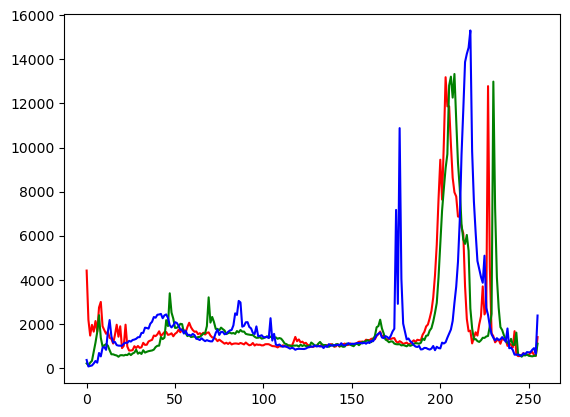

In [34]:
R_hist=cv2.calcHist([R],[0],None,[256],[0,256])
plt.plot(R_hist,'r')
G_hist=cv2.calcHist([G],[0],None,[256],[0,256])
plt.plot(G_hist,'g')
B_hist=cv2.calcHist([B],[0],None,[256],[0,256])
plt.plot(B_hist,'b')


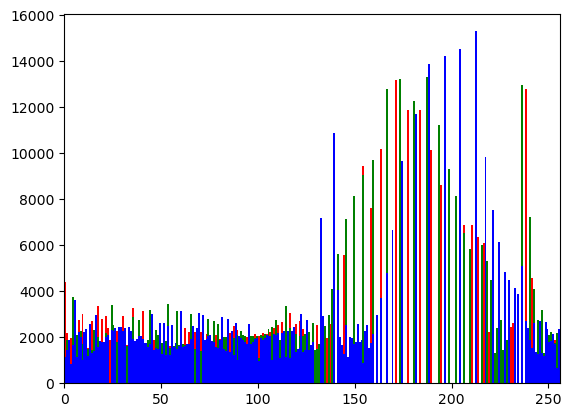

In [35]:
Equ_hist_R=cv2.equalizeHist(R)
plt.xlim([0,256])
plt.hist(Equ_hist_R.ravel(),bins=256, range=(0,256),color='r')
#====================================
Equ_hist_G=cv2.equalizeHist(G)
plt.xlim([0,256])
plt.hist(Equ_hist_G.ravel(),bins=256, range=(0,256),color='g')
#====================================
Equ_hist_B=cv2.equalizeHist(B)
plt.xlim([0,256])
plt.hist(Equ_hist_B.ravel(),bins=256, range=(0,256),color='b')
plt.show()


Text(0.5, 1.0, 'Histogram equalized image')

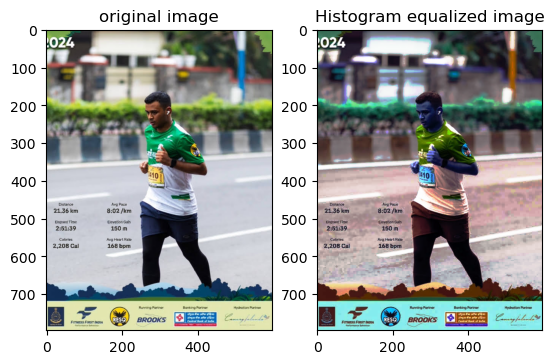

In [36]:
equalized_img = cv2.merge((Equ_hist_R, Equ_hist_G, Equ_hist_B))
equalized_img=cv2.cvtColor(equalized_img,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(image_2)
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(equalized_img)
plt.title('Histogram equalized image')

#### Histogram Equalization using custom function 

In [41]:
def custom_histogram_equalization(gray_img):
    
    M, N = gray_img.shape
    total_pixels = M * N
    
    histogram = np.zeros(256, dtype=int)
    
    for i in range(M):
        for j in range(N):
            intensity = gray_img[i, j]
            histogram[intensity] += 1
    
    pdf = histogram / total_pixels
    
    cdf = np.zeros(256)
    cdf[0] = pdf[0]
    
    for k in range(1, 256):
        cdf[k] = cdf[k-1] + pdf[k]
    

    mapping = np.round(255 * cdf).astype(np.uint8)
    
    equalized_img = np.zeros_like(gray_img)
    
    for i in range(M):
        for j in range(N):
            equalized_img[i, j] = mapping[gray_img[i, j]]
    
    return equalized_img


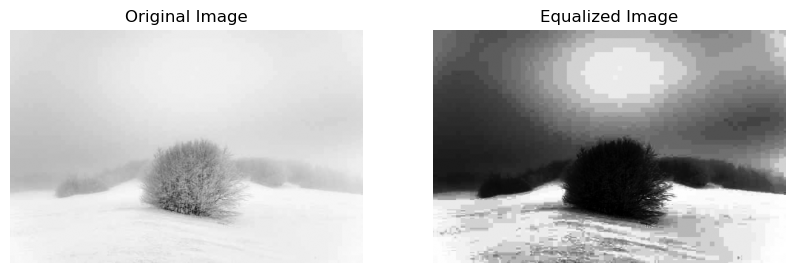

In [42]:

eq_img = custom_histogram_equalization(grey_image)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(grey_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.show()
